In [1]:
from ema_workbench.analysis import prim
import sys
from Utils.util_functions import *
package = 'ema_workbench'

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

experiment 10/10

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

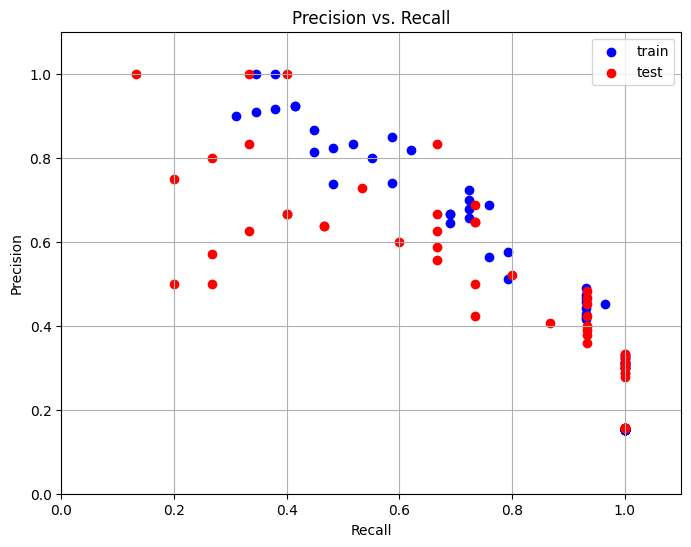

In [3]:
#baseline normal dataset, not modified

number_of_repeats = 10

prec_train = []
rec_train = []

prec_test = []
rec_test = []

for i in range(number_of_repeats):
    sys.stdout.write('\r' + 'experiment' + ' ' + str(i + 1) + '/' + str(number_of_repeats))

    x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], 0.333, package)

    prim_alg = prim.Prim(x.values, y, threshold=0.8, peel_alpha=0.1)
    boxes1 = prim_alg.find_box()
    for index, row in boxes1.peeling_trajectory.iterrows():
        rec_train.append(row['coverage'])
        prec_train.append(row['density'])
    prec_test_temp, rec_test_temp = calculate_precision_recall_test_data_allboxes(boxes1.box_lims, x_test, y_test)

    prec_test.append(prec_test_temp)
    rec_test.append(rec_test_temp)

prec_test, rec_test = flat_prec_rec(prec_test, rec_test)
visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test, 'train', 'test')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

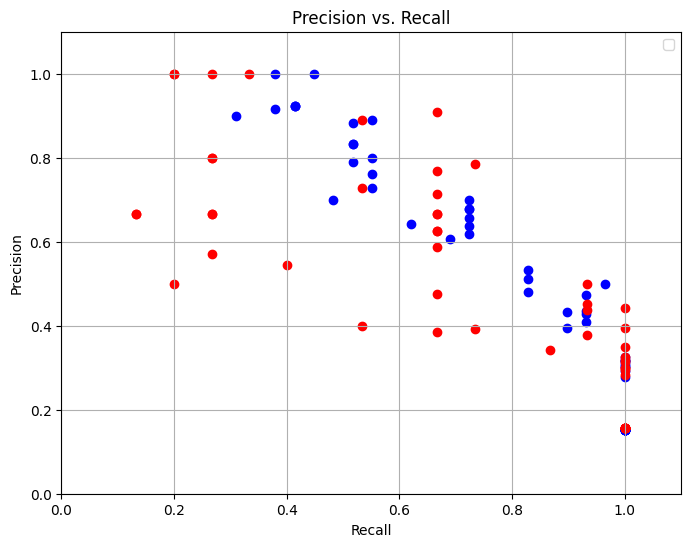

In [8]:
#duplicate 1 in best box
lims = boxes1.box_lims

prec_train = []
rec_train = []

prec_test = []
rec_test = []

for z in range(number_of_repeats):

    x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], 0.333, package)

    labels3 = y
    data3 = x

    # Iterate over each row of temp_data
    for index, row in x.iterrows():
        is_within_limits = True
        # Check if entry lies within the specified limits
        for a, (column, value) in enumerate(row.iteritems()):
            is_within_limits = (lims[len(lims) - 1].iloc[0, a] <= value <= lims[len(lims) - 1].iloc[
                1, a]) & is_within_limits
        if is_within_limits:
            data3.loc[len(data3)] = row
            labels3.loc[len(y)] = y[index]

    prim_alg3 = prim.Prim(data3.values, labels3, threshold=0.8, peel_alpha=0.1)
    boxes3 = prim_alg3.find_box()

    for index, row in boxes3.peeling_trajectory.iterrows():
        rec_train.append(row['coverage'])
        prec_train.append(row['density'])

    prec_test_temp, rec_test_temp = calculate_precision_recall_test_data_allboxes(boxes3.box_lims, x_test, y_test)
    prec_test.append(prec_test_temp)
    rec_test.append(rec_test_temp)

prec_test, rec_test = flat_prec_rec(prec_test, rec_test)

visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test, 'train', 'test')


experiment 10/10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

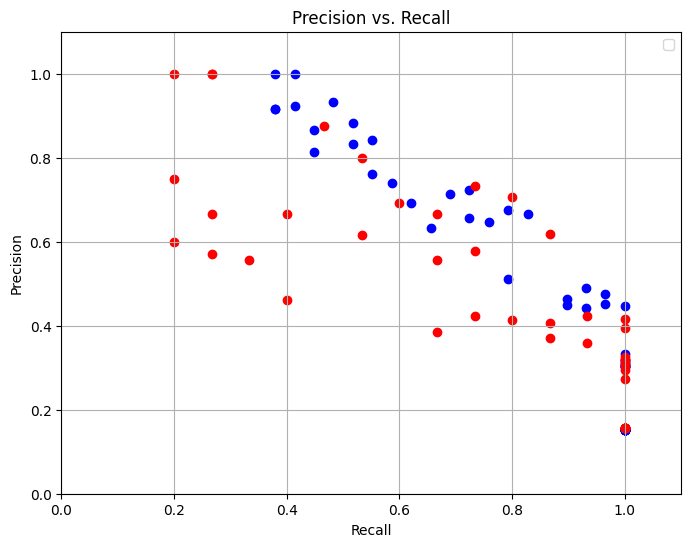

In [7]:
#duplicate 1 in each box from test data

lims = boxes1.box_lims

prec_train = []
rec_train = []

prec_test = []
rec_test = []

for z in range(number_of_repeats):
    x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], 0.333, 'train', 'test')
    sys.stdout.write('\r' + 'experiment' + ' ' + str(z + 1) + '/' + str(number_of_repeats))

    labels2 = y.copy()
    data2 = x.copy()

    #iterate over limit entries which is list of dataframes
    for i in range(len(lims)):
        # Iterate over each row of temp_data
        for index, row in x.iterrows():
            is_within_limits = True
            a = 0
            # Check if entry lies within the specified limits
            for column, value in row.iteritems():
                is_within_limits = (lims[i].iloc[0, a] <= value <= lims[i].iloc[1, a]) & is_within_limits
                a = a + 1
            if is_within_limits:
                data2.loc[len(data2)] = row
                labels2.loc[len(labels2)] = y[index]

    prim_alg2 = prim.Prim(data2.values, labels2, threshold=0.8, peel_alpha=0.1)
    boxes2 = prim_alg2.find_box()

    for index, row in boxes2.peeling_trajectory.iterrows():
        rec_train.append(row['coverage'])
        prec_train.append(row['density'])

    prec_test_temp, rec_test_temp = calculate_precision_recall_test_data_allboxes(boxes2.box_lims, x_test, y_test)
    prec_test.append(prec_test_temp)
    rec_test.append(rec_test_temp)

prec_test, rec_test = flat_prec_rec(prec_test, rec_test)

visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test, 'train', 'test')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

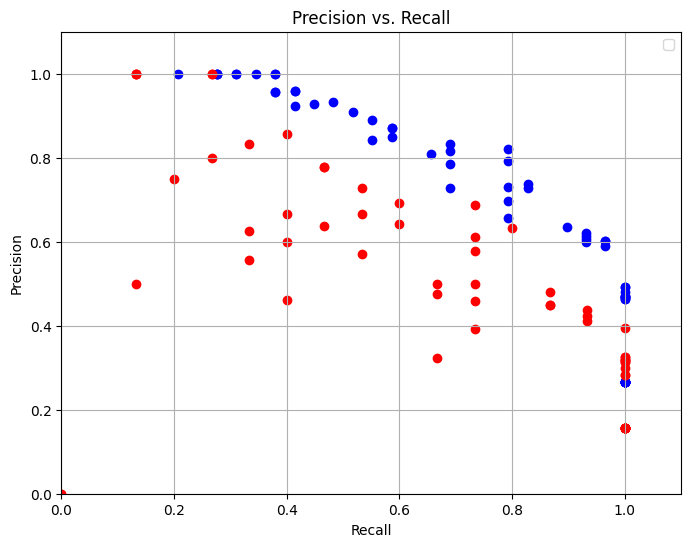

In [9]:
#duplicate all 1en
lims = boxes1

prec_train = []
rec_train = []

prec_test = []
rec_test = []

for z in range(number_of_repeats):

    x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], 0.333, package)

    labels4 = y.copy()
    data4 = x.copy()

    # Iterate over each row of x(train) and duplicate all points with label 1
    for index, row in x.iterrows():
        if y[index] == 1:
            data4.loc[len(data4)] = row
            labels4.loc[len(labels4)] = y[index]

    prim_alg4 = prim.Prim(data4.values, labels4, threshold=0.8, peel_alpha=0.1)
    boxes4 = prim_alg4.find_box()

    for index, row in boxes4.peeling_trajectory.iterrows():
        rec_train.append(row['coverage'])
        prec_train.append(row['density'])

    prec_test_temp, rec_test_temp = calculate_precision_recall_test_data_allboxes(boxes4.box_lims, x_test, y_test)
    prec_test.append(prec_test_temp)
    rec_test.append(rec_test_temp)

prec_test, rec_test = flat_prec_rec(prec_test, rec_test)
visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test, 'train', 'test')